# Graduate Rotational Internship Program

# THE SPARKS FOUNDATION

##  Prediction using Supervised ML
● Predict the percentage of an student based on the number of study hours.  
● This is a simple linear regression task as it involves just 2 variables.   
### Question:- What will be predicted score if a student studies for 9.25 hrs/ day?

● Dataset:- http://bit.ly/w-data 

## Name - Shubham Trivedi

# Importing necessary libraries
- NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
- Pandas is a library written for the Python programming language for data manipulation and analysis
- Matplotlib is one of the most popular Python packages used for data visualization. It is a cross-platform library for making 2D plots from data in arrays.
- Seaborn is an open-source Python library built on top of matplotlib. It is used for data visualization and exploratory data analysis.
- Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Acquiring data


In [2]:
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
print('Data was imported successfully')
data.head(10)

Data was imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
print('## statistical summary of dataset ##')
data.describe()

## statistical summary of dataset ##


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Primary data analysis
- As there only two variables for making prediction, Scatter plot is the clear choice for plotting

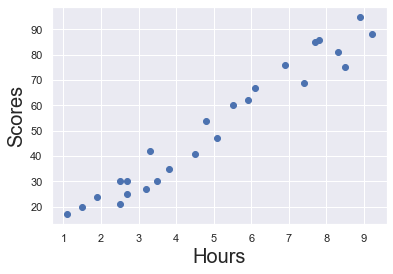

In [4]:
x = data['Hours']
y = data['Scores']
mplt.scatter(x,y)
mplt.xlabel('Hours',fontsize=20)
mplt.ylabel('Scores',fontsize=20)
mplt.show()

# Splitting Data

### Dataset will be divided into two parts for the purpose of training and testing of the model.
- As test_size is kept to 0.2 there will be 80/20 split of data into Train and Test data.
- Random_state is assigned to 0 but that is only for the purpose of getting same random number when we validate the program, Thus it means we can assign any number to random_state argument.But take into consideration that random_state should be assigned to some value otherwise there will be no random number generation


In [5]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

# Training the Model

In [7]:
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")


Training complete.


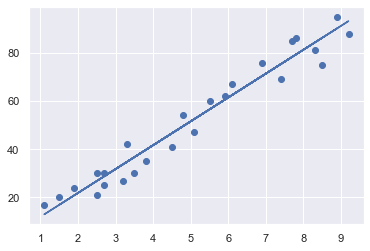

In [8]:
line = regressor.coef_*x+regressor.intercept_
mplt.scatter(x, y)
mplt.plot(x, line);
mplt.show()

In [9]:
print(x_test) 
y_pred = regressor.predict(x_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Predicting Score for Asked value of hours


In [11]:
hours = [9.25]
prediction = regressor.predict([hours])
print("No of Hours = {}".format(hours[0]))
print("Predicted Score = {}".format(prediction[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# Evaluting Model Based on 
## MAE and R square
- Mean absolute error represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.
- R square also called co-efficient of Detemination which shows statistical measure of how close the data are to the fitted regression line.

In [12]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Coefficient of Determintation : {0} \n' 'Accuracy in percentage: {1}'.format(regressor.score(x,y),regressor.score(x,y)*100)) 

Mean Absolute Error: 4.183859899002975
Coefficient of Determintation : 0.9526947647057274 
Accuracy in percentage: 95.26947647057274
